### Setup

In [56]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)
# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

### Exercise 1: Implement a Perceptron Class

In [57]:
class Perceptron:
    # Initialise weights to small random values (e.g., between -0.5 and 0.5)
    # Initialise bias to 0 or a small random value
    # Store the learning rate
    def __init__(self, n_inputs, learning_rate=0.1):
        import random
        self.weights = np.random.uniform(-0.5, 0.5, size=n_inputs)
        self.bias = 0.0
        self.learning_rate = learning_rate
    
    # Return 1 if x ≥ 0, else return 0
    # Hint: Can be done in one line with int(x >= 0) or using NumPy
    def step_function(self, x):
        return int(x >= 0)

    # Compute the weighted sum: ∑i xi ⋅ wi + b
    # Apply the step function
    # Return the result (0 or 1)
    # Hint: Use np.dot(inputs, self.weights) plus bias for the weighted sum
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)
    
    #For each epoch, iterate through all training samples
    # For each sample: predict, compute error, update weights and bias
    # Weight update: Bias update: wi = wi + α ⋅ error ⋅ xi
    # Track and return the history of weights for visualisation
    # Hint: use history.append((self.weights.copy(), self.bias)) to store weights after each epoch in a list Ge
    def train(self, X, y, epochs, verbose=True):
        history = []
        # Store initial weights
        history.append((self.weights.copy(), self.bias))
    
        for epoch in range(epochs):
            total_error = 0
    
            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])
    
                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)
    
                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
    
            # Store weights after this epoch
            history.append((self.weights.copy(), self.bias))
            ## See hint in the markdown cell above
    
            if verbose:
                print(f"Epoch {epoch + 1}: weights = {self.weights}, bias = {self.bias:.4f}, errors = {total_error}")
    
            # Early stopping if no errors
            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break
    
        return history


### Task 2.1: Define the Training Data

In [58]:
# AND Gate Training Data
# Inputs: [x1, x2], Output: x1 AND x2
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1])

# Create and train the perceptron
print("Training Perceptron on AND gate:")
print("="*50)
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)
history = perceptron_and.train(X_and, y_and, epochs=10)

# Test the trained perceptron
print("\n" + "="*50)
print("Testing AND gate:")
print("="*50)
for i, inputs in enumerate(X_and):
    prediction = perceptron_and.predict(inputs)
    print(f"Input: {inputs} -> Predicted: {prediction}, Actual: {y_and[i]}")


Training Perceptron on AND gate:
Epoch 1: weights = [-0.12545988  0.35071431], bias = -0.2000, errors = 2
Epoch 2: weights = [-0.02545988  0.35071431], bias = -0.2000, errors = 2
Epoch 3: weights = [0.07454012 0.35071431], bias = -0.2000, errors = 2
Epoch 4: weights = [0.07454012 0.25071431], bias = -0.3000, errors = 1
Epoch 5: weights = [0.07454012 0.25071431], bias = -0.3000, errors = 0
Converged after 5 epochs!

Testing AND gate:
Input: [0 0] -> Predicted: 0, Actual: 0
Input: [0 1] -> Predicted: 0, Actual: 0
Input: [1 0] -> Predicted: 0, Actual: 0
Input: [1 1] -> Predicted: 1, Actual: 1


### Task 2.2: Train and Test the Perceptron

In [59]:
# Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")
# Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)
# Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True
for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i])
    correct = "✓" if prediction == y_and[i] else "✗"
    if prediction != y_and[i]:
        all_correct = False
    print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [0.23199394 0.09865848]
Initial bias: 0.0

Training...

Epoch 1: weights = [0.13199394 0.09865848], bias = -0.2000, errors = 2
Epoch 2: weights = [0.13199394 0.09865848], bias = -0.2000, errors = 0
Converged after 2 epochs!

Testing AND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 0, Expected: 0 ✓
Input: [1 0] -> Predicted: 0, Expected: 0 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


### Task 2.3: Visualise the Decision Boundary

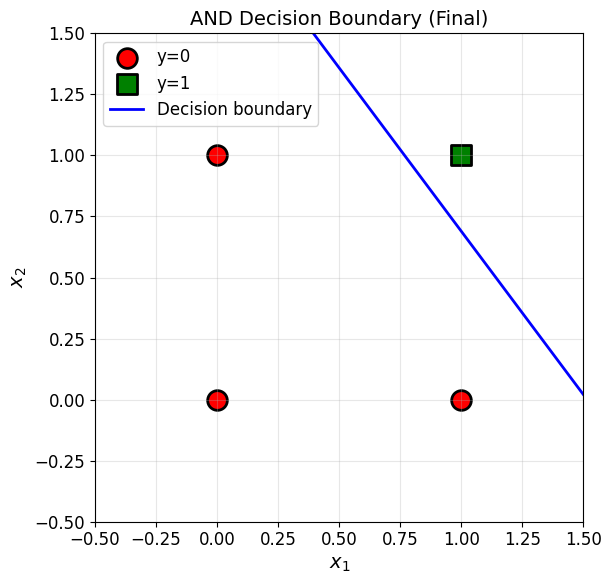

In [60]:
# Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
    """
    Plot data points and decision boundary.
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, 2)
        Input data points
    y : array-like, shape (n_samples,)
        Labels (0 or 1)
    weights : array-like, shape (2,)
        Perceptron weights [w1, w2]
    bias : float
        Perceptron bias
    title : str
        Plot title
    ax : matplotlib axis (optional)
        Axis to plot on. If None, creates new figure.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot points
    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], c='red', marker='o', s=200,
                      edgecolors='black', linewidths=2, label='y=0' if i == 0 else '')
        else:
            ax.scatter(X[i, 0], X[i, 1], c='green', marker='s', s=200,
                      edgecolors='black', linewidths=2, label='y=1' if i == 3 else '')
    
    # Plot decision boundary
    # Line: w1*x1 + w2*x2 + b = 0
    # => x2 = -(w1/w2)*x1 - b/w2
    
    x1_range = np.linspace(-0.5, 1.5, 100)
    
    if abs(weights[1]) > 1e-10:  # Avoid division by zero
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, 'b-', linewidth=2, label='Decision boundary')
    else:
        # Vertical line case
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color='b', linewidth=2, label='Decision boundary')
    
    # Formatting
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    ax.set_aspect('equal')
    
    return ax

# Test the plotting function with the trained AND perceptron
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,
                      "AND Decision Boundary (Final)")
plt.tight_layout()
plt.show()

### Task 2.4: Animate the Learning Process

AND - Decision Boundary Evolution:


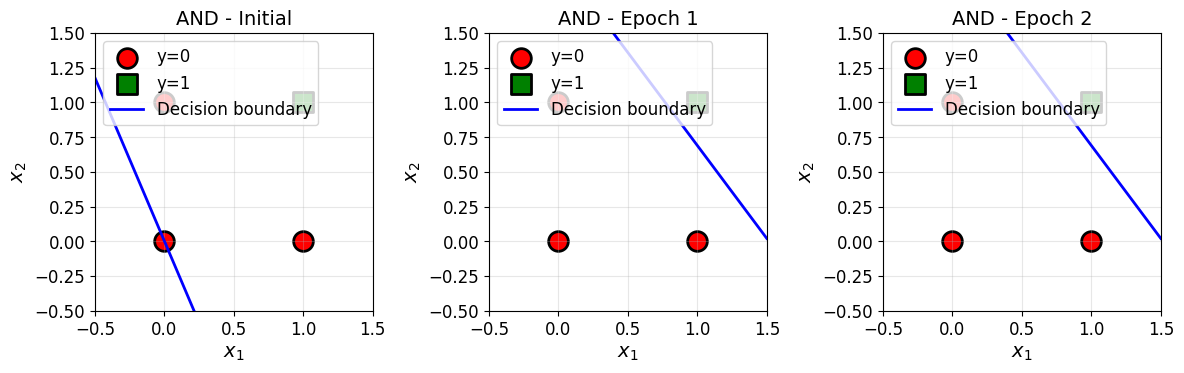

In [61]:
# Visualise decision boundary evolution across epochs
def plot_training_evolution(X, y, history, title_prefix=""):
    """
    Plot decision boundary evolution across training epochs.
    """
    n_epochs = len(history)

    # Determine grid size
    n_cols = min(5, n_epochs)
    n_rows = (n_epochs + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

    # Handle single row/column cases
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)

    for idx, (weights, bias) in enumerate(history):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]

        epoch_label = "Initial" if idx == 0 else f"Epoch {idx}"
        plot_decision_boundary(X, y, weights, bias,
                               f"{title_prefix}{epoch_label}", ax=ax)

    # Hide empty subplots
    for idx in range(n_epochs, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Plot AND training evolution
print("AND - Decision Boundary Evolution:")
plot_training_evolution(X_and, y_and, history_and, "AND - ")

### Task 2.5: Display Weight Updates Table

In [62]:
import pandas as pd

def create_weight_table(history):
    """
    Create a pandas DataFrame showing weights at each epoch.
    """
    data = {
        'Epoch': [],
        'w₁': [],
        'w₂': [],
        'bias': []
    }

    for epoch, (weights, bias) in enumerate(history):
        data['Epoch'].append('Initial' if epoch == 0 else epoch)
        data['w₁'].append(f"{weights[0]:.4f}")
        data['w₂'].append(f"{weights[1]:.4f}")
        data['bias'].append(f"{bias:.4f}")

    return pd.DataFrame(data)

print("AND - Weight History Table:")
df_and = create_weight_table(history_and)
display(df_and)

AND - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,0.2320,0.0987,0.0000
1,1,0.1320,0.0987,-0.2000
2,2,0.1320,0.0987,-0.2000


### Exercise 3: Train the Perceptron

In [63]:
# 3.1.1 Define the OR training data
X_or = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_or = np.array([0, 1, 1, 1])

#### 3.1.2 Train a new perceptron (OR)

In [64]:
perceptron_or = Perceptron(n_inputs=2, learning_rate=0.1)
print("Initial weights:", perceptron_or.weights)
print("Initial bias:", perceptron_or.bias)
print("\nTraining OR perceptron...\n")
history_or = perceptron_or.train(X_or, y_or, epochs=10)

Initial weights: [-0.34398136 -0.34400548]
Initial bias: 0.0

Training OR perceptron...

Epoch 1: weights = [-0.14398136 -0.14400548], bias = 0.2000, errors = 4
Epoch 2: weights = [-0.14398136 -0.04400548], bias = 0.2000, errors = 2
Epoch 3: weights = [-0.04398136 -0.04400548], bias = 0.2000, errors = 2
Epoch 4: weights = [-0.04398136 -0.04400548], bias = 0.1000, errors = 1
Epoch 5: weights = [-0.04398136  0.05599452], bias = 0.1000, errors = 2
Epoch 6: weights = [0.05601864 0.05599452], bias = 0.1000, errors = 2
Epoch 7: weights = [0.05601864 0.05599452], bias = 0.0000, errors = 1
Epoch 8: weights = [0.05601864 0.15599452], bias = 0.0000, errors = 2
Epoch 9: weights = [0.15601864 0.15599452], bias = 0.0000, errors = 2
Epoch 10: weights = [0.15601864 0.15599452], bias = -0.1000, errors = 1


#### 3.1.3 Test and verify (OR)

In [65]:
print("\nTesting OR perceptron:")
print("-" * 40)
all_correct_or = True
for i in range(len(X_or)):
    prediction = perceptron_or.predict(X_or[i])
    correct = "✓" if prediction == y_or[i] else "✗"
    if prediction != y_or[i]:
        all_correct_or = False
    print(f"Input: {X_or[i]} -> Predicted: {prediction}, Expected: {y_or[i]} {correct}")
print("-" * 40)
print(f"All predictions correct: {all_correct_or}")


Testing OR perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 1, Expected: 1 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


#### 3.1.4 Visualise the decision boundary (OR)

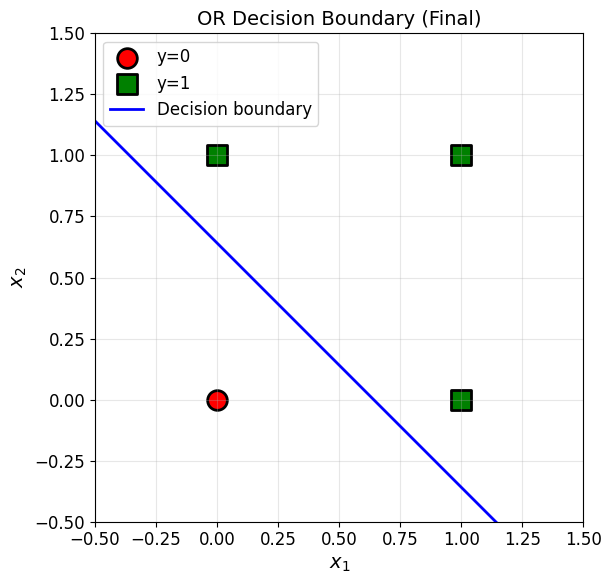

In [66]:
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,
                      "OR Decision Boundary (Final)")
plt.tight_layout()
plt.show()

#### 3.1.5 Weight history table (OR)

In [67]:
print("OR - Weight History Table:")
df_or = create_weight_table(history_or)
display(df_or)

OR - Weight History Table:


,Epoch,w₁,w₂,bias
0,Initial,-0.3440,-0.3440,0.0000
1,1,-0.1440,-0.1440,0.2000
2,2,-0.1440,-0.0440,0.2000
3,3,-0.0440,-0.0440,0.2000
4,4,-0.0440,-0.0440,0.1000
5,5,-0.0440,0.0560,0.1000
6,6,0.0560,0.0560,0.1000
7,7,0.0560,0.0560,0.0000
8,8,0.0560,0.1560,0.0000
9,9,0.1560,0.1560,0.0000


### Task 3.2: Compare AND and OR Decision Boundaries

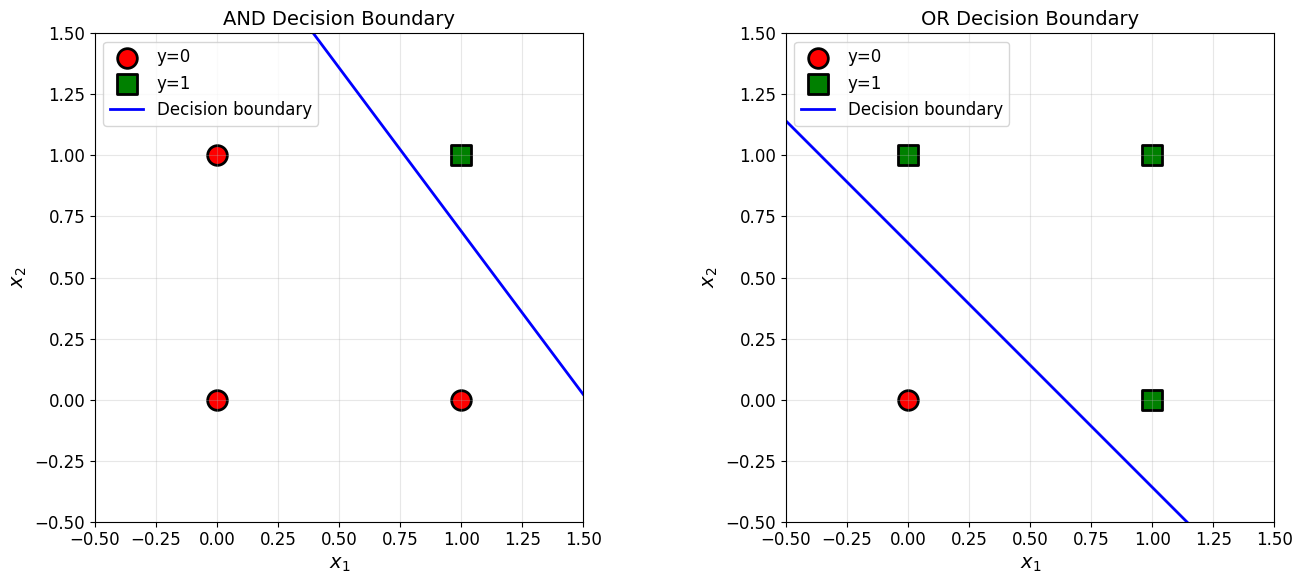

Discussion:
------------------------------------------------------------
AND: The decision boundary separates (1,1) from the other three points.
 The line passes 'above' most points, classifying only the top-right as 1.

OR: The decision boundary separates (0,0) from the other three points.
 The line passes 'below' most points, classifying only the origin as 0.

Both are solvable because in each case, the two classes can be separated
by a single straight line - they are LINEARLY SEPARABLE.


In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,
 "AND Decision Boundary", ax=ax1)
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,
 "OR Decision Boundary", ax=ax2)
plt.tight_layout()
plt.show()
# Discussion
print("Discussion:")
print("-" * 60)
print("AND: The decision boundary separates (1,1) from the other three points.")
print(" The line passes 'above' most points, classifying only the top-right as 1.")
print()
print("OR: The decision boundary separates (0,0) from the other three points.")
print(" The line passes 'below' most points, classifying only the origin as 0.")
print()
print("Both are solvable because in each case, the two classes can be separated")
print("by a single straight line - they are LINEARLY SEPARABLE.")

### Exercise 4: XOR

#### 4.1.1 Define XOR training data

In [69]:
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_xor = np.array([0, 1, 1, 0])

#### 4.1.2 Attempt to train a perceptron for XOR

In [70]:
perceptron_xor = Perceptron(n_inputs=2, learning_rate=0.1)
history_xor = perceptron_xor.train(X_xor, y_xor, epochs=10, verbose=False)

# Summary
print("XOR perceptron summary:")
print("-" * 40)
print(f"Final weights: {perceptron_xor.weights}")
print(f"Final bias: {perceptron_xor.bias}")

# Test and report accuracy
errors = 0
for i in range(len(X_xor)):
    prediction = perceptron_xor.predict(X_xor[i])
    if prediction != y_xor[i]:
        errors += 1
    print(f"Input: {X_xor[i]} -> Predicted: {prediction}, Expected: {y_xor[i]}")
print("-" * 40)
print(f"Errors: {errors} / {len(X_xor)}")

XOR perceptron summary:
----------------------------------------
Final weights: [-0.24191639  0.06617615]
Final bias: 0.0
Input: [0 0] -> Predicted: 1, Expected: 0
Input: [0 1] -> Predicted: 1, Expected: 1
Input: [1 0] -> Predicted: 0, Expected: 1
Input: [1 1] -> Predicted: 0, Expected: 0
----------------------------------------
Errors: 2 / 4


#### 4.1.3 Test the XOR perceptron (expected to fail)

In [71]:
print("\nTesting XOR perceptron:")
print("-" * 40)
errors = 0
for i in range(len(X_xor)):
    prediction = perceptron_xor.predict(X_xor[i])
    if prediction != y_xor[i]:
        errors += 1
        status = "⚠️"
    else:
        status = "✓"
    print(f"Input: {X_xor[i]} -> Predicted: {prediction}, Expected: {y_xor[i]} {status}")
print("-" * 40)
print(f"Errors: {errors} / {len(X_xor)}")
if errors > 0:
    print("As expected, a single perceptron cannot learn XOR (not linearly separable).")


Testing XOR perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 1, Expected: 0 ⚠️
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 0, Expected: 1 ⚠️
Input: [1 1] -> Predicted: 0, Expected: 0 ✓
----------------------------------------
Errors: 2 / 4
As expected, a single perceptron cannot learn XOR (not linearly separable).


### Task 4.2: Visualise Why XOR is Linearly Inseparable

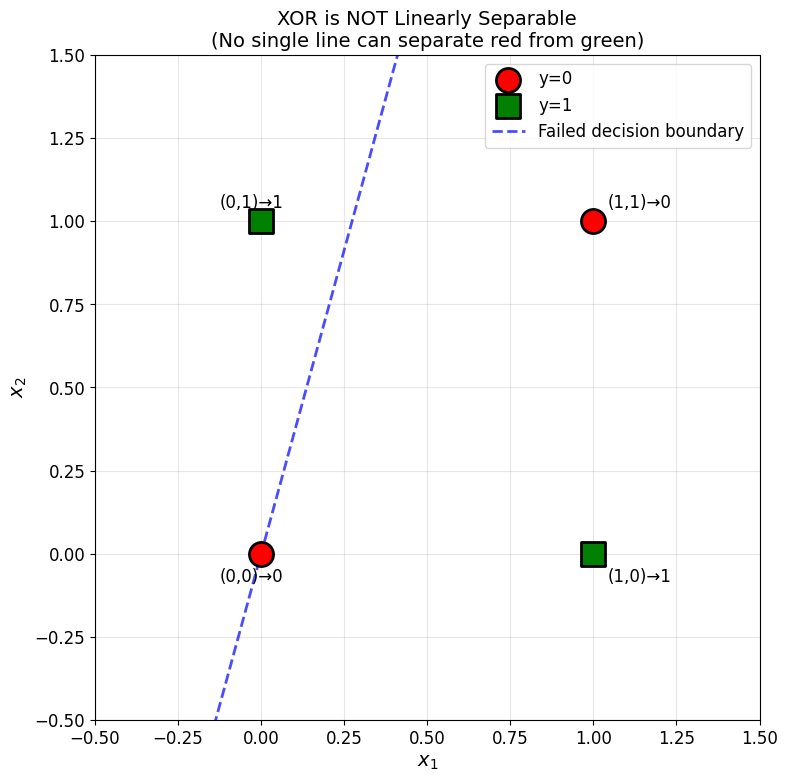

In [72]:
# Visualise XOR data points and failed decision boundary
fig, ax = plt.subplots(figsize=(8, 8))
# Plot points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=300,
                   edgecolors='black', linewidths=2, zorder=5,
                   label='y=0' if i == 0 else '')
    else:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=300,
                   edgecolors='black', linewidths=2, zorder=5,
                   label='y=1' if i == 1 else '')
# Add labels to points
ax.annotate('(0,0)→0', (0, 0), textcoords="offset points", xytext=(-30, -20), fontsize=12)
ax.annotate('(0,1)→1', (0, 1), textcoords="offset points", xytext=(-30, 10), fontsize=12)
ax.annotate('(1,0)→1', (1, 0), textcoords="offset points", xytext=(10, -20), fontsize=12)
ax.annotate('(1,1)→0', (1, 1), textcoords="offset points", xytext=(10, 10), fontsize=12)
# Plot the failed decision boundary
x1_range = np.linspace(-0.5, 1.5, 100)
if abs(perceptron_xor.weights[1]) > 1e-10:
    x2_boundary = -(perceptron_xor.weights[0] / perceptron_xor.weights[1]) * x1_range \
        - (perceptron_xor.bias / perceptron_xor.weights[1])
    ax.plot(x1_range, x2_boundary, 'b--', linewidth=2, alpha=0.7,
            label='Failed decision boundary')
# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title('XOR is NOT Linearly Separable\n(No single line can separate red from green)',
             fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

### Task 4.3: Visualise AND, OR, and XOR Together

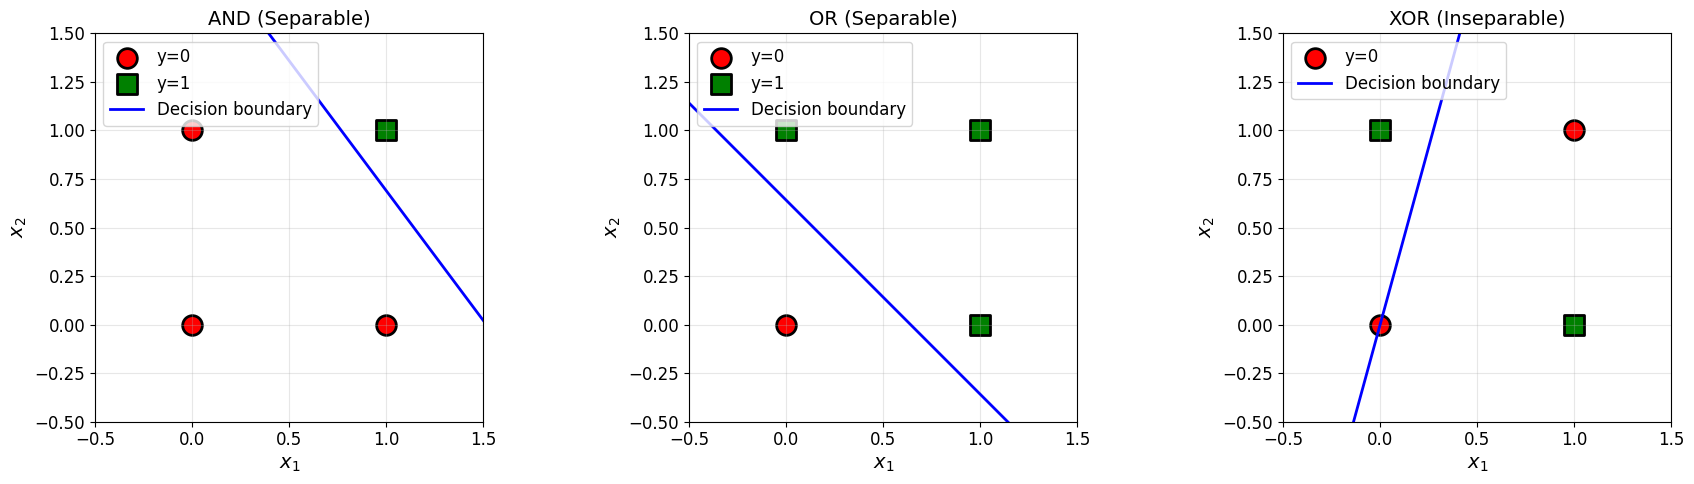

Figure saved as 'linear_separability_comparison.png'


In [73]:
# Create 3-panel comparison figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# AND decision boundary
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,
                       "AND (Separable)", ax=ax1)

# OR decision boundary
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias,
                       "OR (Separable)", ax=ax2)

# XOR without valid decision boundary
plot_decision_boundary(X_xor, y_xor, perceptron_xor.weights, perceptron_xor.bias,
                       "XOR (Inseparable)", ax=ax3)

plt.tight_layout()
plt.savefig('linear_separability_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Figure saved as 'linear_separability_comparison.png'")